In [46]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

In [31]:
df = pd.read_csv("/kaggle/input/human-disease-prediction-dataset/Training.csv")  # Replace with your actual file name
test_data = pd.read_csv("/kaggle/input/human-disease-prediction-dataset/Testing.csv")    # Replace with your actual file name

# Separate features and target for train and test sets
X_train = train_data.iloc[:, 1:-1]
y_train = pd.get_dummies(train_data['prognosis'])  # One-hot encode the target
X_test = test_data.iloc[:, 1:-1]
y_test = pd.get_dummies(test_data['prognosis'])

In [27]:
# Step 2: Separate features (symptoms) and target (prognosis)
X = df.iloc[:, 1:-1]  # All symptom columns (assumes first column is an ID or disease name)
y = df["prognosis"]   # Target column (disease names)


In [33]:
X.head(2)

,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
y.head(3)

0    Fungal infection
1    Fungal infection
2    Fungal infection
Name: prognosis, dtype: object

In [36]:
y.shape

(4920,)

In [38]:
X_train =X
y_train =y

In [87]:
X_train.shape

(4920, 131)

In [39]:
X_train.head(3)

,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y_train.head(3)

0    Fungal infection
1    Fungal infection
2    Fungal infection
Name: prognosis, dtype: object

In [41]:
y_train.shape

(4920,)

In [47]:
# Step 2: Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_train_categorical = to_categorical(y_train_encoded)

In [48]:
# Save label classes for later use in Streamlit
np.save("label_classes.npy", label_encoder.classes_)

In [49]:
# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [50]:
# Save the scaler for Streamlit
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [60]:
X_train_scaled.shape

(4920, 131)

In [55]:
X_train_scaled.shape[1]

131

In [57]:
y_train_categorical.shape[1]

41

In [58]:
y_train_categorical.shape

(4920, 41)

In [61]:
# Build the ANN model
model = Sequential([
    Dense(256, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(y_train_categorical.shape[1], activation='softmax')
])

In [62]:
# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
# Step 6: Train the model
history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5956 - loss: 1.9069 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9963 - loss: 0.0412 - val_accuracy: 1.0000 - val_loss: 4.5414e-04
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9996 - loss: 0.0137 - val_accuracy: 1.0000 - val_loss: 8.6013e-05
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9986 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 4.9644e-05
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9991 - loss: 0.0078 - val_accuracy: 1.0000 - val_loss: 2.3226e-05
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 1.2109e-05
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 1.5117e-05
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 

In [64]:
# Step 7: Save the model and encoder
model.save("disease_prediction_ann_model.h5")

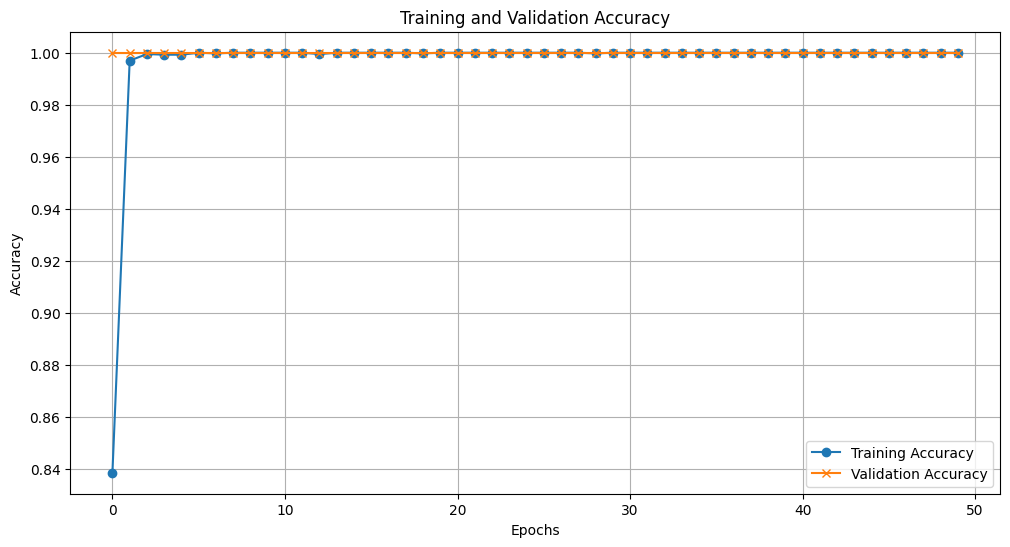

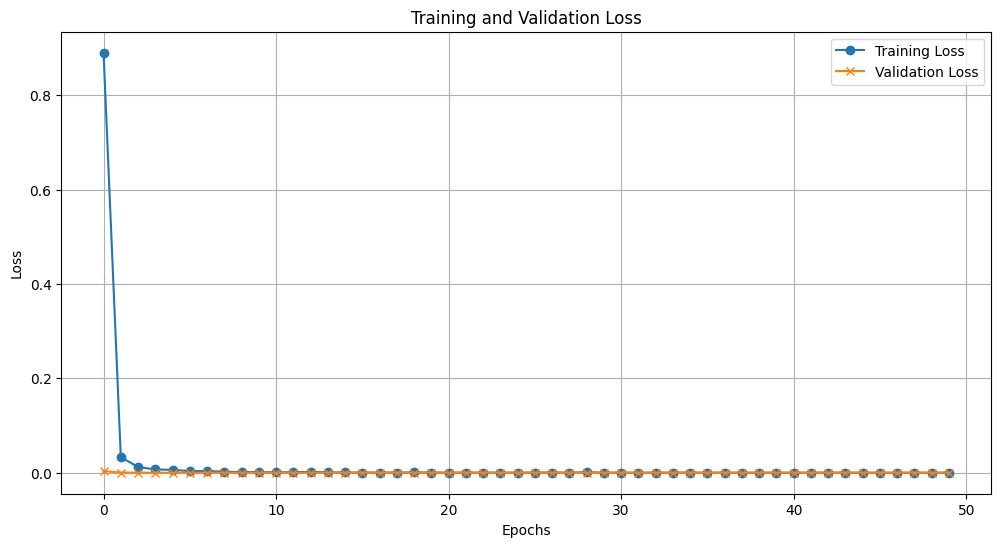

In [65]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output of model.fit()

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='x')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [66]:
test_data = pd.read_csv("/kaggle/input/human-disease-prediction-dataset/Testing.csv")

In [78]:
X_test = test_data.iloc[:, 1:-1]
y_test = test_data["prognosis"] 

In [79]:
X_test.head(2)

,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
y_test.shape

(42,)

In [81]:
X_test = scaler.transform(X_test)

In [82]:
X_test.shape

(42, 131)

In [83]:
# Encode the test labels
y_test_encoded = label_encoder.transform(y_test)
y_test_categorical = to_categorical(y_test_encoded)

In [84]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical)
print(f"Test Accuracy: {test_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step - accuracy: 0.9841 - loss: 0.1541 
Test Accuracy: 0.976190447807312


In [86]:
# Save the symptom order for Streamlit
symptom_names = X_train.columns.tolist()
with open("symptom_order.txt", "w") as file:
    file.write("\n".join(symptom_names)) 